In [18]:
# Collet data through quandl: 20 stocks from 2009-11-01 to 2019-11-27
import pandas as pd
import datetime as dt
import pandas_datareader.data as pdd

import sys
!{sys.executable} -m pip install quandl
import quandl
quandl.ApiConfig.api_key = 'CC9DTkkRBqUvFdy1XzuQ'


In [19]:
start=dt.datetime(2009,11,14)
end=dt.datetime(2019,11,27)

lst=['AAPL','AMZN','MSFT','JPM','GOOGL','BA','LMT','WMT','C','IBM','MCO','UAL','BBY','BLK','NVDA','MCK','MRK','XOM','ORCL','NKE']
dfdc={}

for i in lst:
    df=pdd.DataReader(i, "quandl",start,end,api_key='CC9DTkkRBqUvFdy1XzuQ')
    df = df.reindex(index=df.index[::-1])
    df.drop(df.loc[:, 'Open':'SplitRatio'].columns, inplace=True, axis = 1)
    dfdc[i]=df

dfdc['AAPL'].head(5)

,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,
2009-11-16,26.407044,26.730899,26.346642,26.554835,121301600.0
2009-11-17,26.484152,26.658931,26.345357,26.602385,99128400.0
2009-11-18,26.543269,26.602385,26.216843,26.468731,93580200.0
2009-11-19,26.295237,26.295237,25.677085,25.768330,135581600.0
2009-11-20,25.593551,25.752908,25.414916,25.692506,101666600.0


In [20]:
# Add 8 indicators: RSI,ADX,PSAR_UP,PSAR_DOWN,EMA-5days,MACD,ATR,SR
import sys
!{sys.executable} -m pip install ta
from ta import *

import numpy as np

lags = 5

for i in dfdc:
    dfdc[i]['Return'] = np.log(dfdc[i]['AdjClose'] / dfdc[i]['AdjClose'].shift(1))
    dfdc[i]['y']=np.where(dfdc[i]['Return']>0, 1, 0)
    dfdc[i]['RSI']=momentum.rsi(dfdc[i]['AdjClose'])
    dfdc[i]['ADX']=trend.adx(dfdc[i]['AdjHigh'], dfdc[i]['AdjLow'], dfdc[i]['AdjClose'])
    dfdc[i]['PSAR_UP']=trend.psar_up(dfdc[i]['AdjHigh'], dfdc[i]['AdjLow'], dfdc[i]['AdjClose'])
    dfdc[i]['PSAR_DOWN']=trend.psar_down(dfdc[i]['AdjHigh'], dfdc[i]['AdjLow'], dfdc[i]['AdjClose'])
    dfdc[i]['EMA']=trend.ema_indicator(dfdc[i]['AdjClose'],n=5)
    dfdc[i]['EMA_diff']=dfdc[i]['EMA']-dfdc[i]['AdjClose']
    dfdc[i]['MACD']=trend.macd(dfdc[i]['AdjClose'])
    dfdc[i]['ATR']=volatility.average_true_range(dfdc[i]['AdjHigh'], dfdc[i]['AdjLow'], dfdc[i]['AdjClose'])
    dfdc[i]['SR']=momentum.stoch(dfdc[i]['AdjHigh'], dfdc[i]['AdjLow'], dfdc[i]['AdjClose'])

    for k in range(0,lags):
        dfdc[i]['RSI_' + str(k+1)] = dfdc[i]['RSI'].shift(k+1)
        dfdc[i]['ADX_' + str(k+1)] = dfdc[i]['ADX'].shift(k+1)
        dfdc[i]['PSAR_UP_' + str(k+1)] = dfdc[i]['PSAR_UP'].shift(k+1)
        dfdc[i]['PSAR_DOWN_' + str(k+1)] = dfdc[i]['PSAR_DOWN'].shift(k+1)
        dfdc[i]['EMA_diff_' + str(k+1)] = dfdc[i]['EMA_diff'].shift(k+1)
        dfdc[i]['MACD_' + str(k+1)] = dfdc[i]['MACD'].shift(k+1)
        dfdc[i]['ATR_' + str(k+1)] = dfdc[i]['ATR'].shift(k+1)
        dfdc[i]['SR_' + str(k+1)] = dfdc[i]['SR'].shift(k+1)

dfdc['AAPL'].head(5)

D:\Python\lib\site-packages\ta\trend.py:543: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
D:\Python\lib\site-packages\ta\trend.py:547: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,Return,y,RSI,ADX,PSAR_UP,...,ATR_4,SR_4,RSI_5,ADX_5,PSAR_UP_5,PSAR_DOWN_5,EMA_diff_5,MACD_5,ATR_5,SR_5
Date,,,,,,,,,,,,,,,,,,,,,
2009-11-16,26.407044,26.730899,26.346642,26.554835,121301600.0,NaN,0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-11-17,26.484152,26.658931,26.345357,26.602385,99128400.0,0.001789,1,100.000000,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-11-18,26.543269,26.602385,26.216843,26.468731,93580200.0,-0.005037,0,24.832215,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-11-19,26.295237,26.295237,25.677085,25.768330,135581600.0,-0.026818,0,4.737085,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-11-20,25.593551,25.752908,25.414916,25.692506,101666600.0,-0.002947,0,4.328698,0.0,NaN,...,0.0,54.180602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


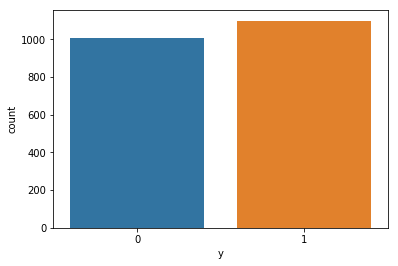

In [21]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import math

sns.countplot(x='y',data=dfdc['AAPL'])

In [22]:
# Check NaN values
for i in dfdc:
    print(dfdc[i].isnull().sum())

AdjOpen           0
AdjHigh           0
AdjLow            0
AdjClose          0
AdjVolume         0
Return            1
y                 0
RSI               1
ADX               0
PSAR_UP         865
PSAR_DOWN      1239
EMA               4
EMA_diff          4
MACD             25
ATR               0
SR                0
RSI_1             2
ADX_1             1
PSAR_UP_1       865
PSAR_DOWN_1    1240
EMA_diff_1        5
MACD_1           26
ATR_1             1
SR_1              1
RSI_2             3
ADX_2             2
PSAR_UP_2       865
PSAR_DOWN_2    1241
EMA_diff_2        6
MACD_2           27
ATR_2             2
SR_2              2
RSI_3             4
ADX_3             3
PSAR_UP_3       865
PSAR_DOWN_3    1242
EMA_diff_3        7
MACD_3           28
ATR_3             3
SR_3              3
RSI_4             5
ADX_4             4
PSAR_UP_4       865
PSAR_DOWN_4    1243
EMA_diff_4        8
MACD_4           29
ATR_4             4
SR_4              4
RSI_5             6
ADX_5             5


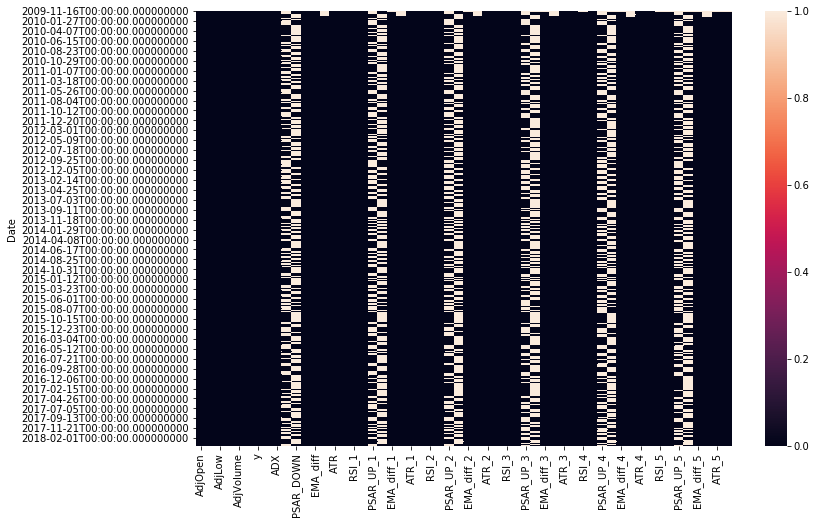

In [23]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(dfdc['AAPL'].isnull(),yticklabels='auto',linewidths=0)

In [24]:
# Confirm indicators PSAR_UP_lag and PSAR_DOWN_lag do not have zero values
for i in dfdc:
    print(dfdc[i].loc[dfdc[i]['PSAR_UP_1'] == 0])
    print(dfdc[i].loc[dfdc[i]['PSAR_UP_2'] == 0])
    print(dfdc[i].loc[dfdc[i]['PSAR_UP_3'] == 0])
    print(dfdc[i].loc[dfdc[i]['PSAR_UP_4'] == 0])
    print(dfdc[i].loc[dfdc[i]['PSAR_UP_5'] == 0])
    print(dfdc[i].loc[dfdc[i]['PSAR_DOWN_1'] == 0])
    print(dfdc[i].loc[dfdc[i]['PSAR_DOWN_2'] == 0])
    print(dfdc[i].loc[dfdc[i]['PSAR_DOWN_3'] == 0])
    print(dfdc[i].loc[dfdc[i]['PSAR_DOWN_4'] == 0])
    print(dfdc[i].loc[dfdc[i]['PSAR_DOWN_5'] == 0])

Empty DataFrame
Columns: [AdjOpen, AdjHigh, AdjLow, AdjClose, AdjVolume, Return, y, RSI, ADX, PSAR_UP, PSAR_DOWN, EMA, EMA_diff, MACD, ATR, SR, RSI_1, ADX_1, PSAR_UP_1, PSAR_DOWN_1, EMA_diff_1, MACD_1, ATR_1, SR_1, RSI_2, ADX_2, PSAR_UP_2, PSAR_DOWN_2, EMA_diff_2, MACD_2, ATR_2, SR_2, RSI_3, ADX_3, PSAR_UP_3, PSAR_DOWN_3, EMA_diff_3, MACD_3, ATR_3, SR_3, RSI_4, ADX_4, PSAR_UP_4, PSAR_DOWN_4, EMA_diff_4, MACD_4, ATR_4, SR_4, RSI_5, ADX_5, PSAR_UP_5, PSAR_DOWN_5, EMA_diff_5, MACD_5, ATR_5, SR_5]
Index: []

[0 rows x 56 columns]
Empty DataFrame
Columns: [AdjOpen, AdjHigh, AdjLow, AdjClose, AdjVolume, Return, y, RSI, ADX, PSAR_UP, PSAR_DOWN, EMA, EMA_diff, MACD, ATR, SR, RSI_1, ADX_1, PSAR_UP_1, PSAR_DOWN_1, EMA_diff_1, MACD_1, ATR_1, SR_1, RSI_2, ADX_2, PSAR_UP_2, PSAR_DOWN_2, EMA_diff_2, MACD_2, ATR_2, SR_2, RSI_3, ADX_3, PSAR_UP_3, PSAR_DOWN_3, EMA_diff_3, MACD_3, ATR_3, SR_3, RSI_4, ADX_4, PSAR_UP_4, PSAR_DOWN_4, EMA_diff_4, MACD_4, ATR_4, SR_4, RSI_5, ADX_5, PSAR_UP_5, PSAR_DOWN_5, EM

[0 rows x 56 columns]
Empty DataFrame
Columns: [AdjOpen, AdjHigh, AdjLow, AdjClose, AdjVolume, Return, y, RSI, ADX, PSAR_UP, PSAR_DOWN, EMA, EMA_diff, MACD, ATR, SR, RSI_1, ADX_1, PSAR_UP_1, PSAR_DOWN_1, EMA_diff_1, MACD_1, ATR_1, SR_1, RSI_2, ADX_2, PSAR_UP_2, PSAR_DOWN_2, EMA_diff_2, MACD_2, ATR_2, SR_2, RSI_3, ADX_3, PSAR_UP_3, PSAR_DOWN_3, EMA_diff_3, MACD_3, ATR_3, SR_3, RSI_4, ADX_4, PSAR_UP_4, PSAR_DOWN_4, EMA_diff_4, MACD_4, ATR_4, SR_4, RSI_5, ADX_5, PSAR_UP_5, PSAR_DOWN_5, EMA_diff_5, MACD_5, ATR_5, SR_5]
Index: []

[0 rows x 56 columns]
Empty DataFrame
Columns: [AdjOpen, AdjHigh, AdjLow, AdjClose, AdjVolume, Return, y, RSI, ADX, PSAR_UP, PSAR_DOWN, EMA, EMA_diff, MACD, ATR, SR, RSI_1, ADX_1, PSAR_UP_1, PSAR_DOWN_1, EMA_diff_1, MACD_1, ATR_1, SR_1, RSI_2, ADX_2, PSAR_UP_2, PSAR_DOWN_2, EMA_diff_2, MACD_2, ATR_2, SR_2, RSI_3, ADX_3, PSAR_UP_3, PSAR_DOWN_3, EMA_diff_3, MACD_3, ATR_3, SR_3, RSI_4, ADX_4, PSAR_UP_4, PSAR_DOWN_4, EMA_diff_4, MACD_4, ATR_4, SR_4, RSI_5, ADX_5, PSAR

[0 rows x 56 columns]
Empty DataFrame
Columns: [AdjOpen, AdjHigh, AdjLow, AdjClose, AdjVolume, Return, y, RSI, ADX, PSAR_UP, PSAR_DOWN, EMA, EMA_diff, MACD, ATR, SR, RSI_1, ADX_1, PSAR_UP_1, PSAR_DOWN_1, EMA_diff_1, MACD_1, ATR_1, SR_1, RSI_2, ADX_2, PSAR_UP_2, PSAR_DOWN_2, EMA_diff_2, MACD_2, ATR_2, SR_2, RSI_3, ADX_3, PSAR_UP_3, PSAR_DOWN_3, EMA_diff_3, MACD_3, ATR_3, SR_3, RSI_4, ADX_4, PSAR_UP_4, PSAR_DOWN_4, EMA_diff_4, MACD_4, ATR_4, SR_4, RSI_5, ADX_5, PSAR_UP_5, PSAR_DOWN_5, EMA_diff_5, MACD_5, ATR_5, SR_5]
Index: []

[0 rows x 56 columns]
Empty DataFrame
Columns: [AdjOpen, AdjHigh, AdjLow, AdjClose, AdjVolume, Return, y, RSI, ADX, PSAR_UP, PSAR_DOWN, EMA, EMA_diff, MACD, ATR, SR, RSI_1, ADX_1, PSAR_UP_1, PSAR_DOWN_1, EMA_diff_1, MACD_1, ATR_1, SR_1, RSI_2, ADX_2, PSAR_UP_2, PSAR_DOWN_2, EMA_diff_2, MACD_2, ATR_2, SR_2, RSI_3, ADX_3, PSAR_UP_3, PSAR_DOWN_3, EMA_diff_3, MACD_3, ATR_3, SR_3, RSI_4, ADX_4, PSAR_UP_4, PSAR_DOWN_4, EMA_diff_4, MACD_4, ATR_4, SR_4, RSI_5, ADX_5, PSAR

Empty DataFrame
Columns: [AdjOpen, AdjHigh, AdjLow, AdjClose, AdjVolume, Return, y, RSI, ADX, PSAR_UP, PSAR_DOWN, EMA, EMA_diff, MACD, ATR, SR, RSI_1, ADX_1, PSAR_UP_1, PSAR_DOWN_1, EMA_diff_1, MACD_1, ATR_1, SR_1, RSI_2, ADX_2, PSAR_UP_2, PSAR_DOWN_2, EMA_diff_2, MACD_2, ATR_2, SR_2, RSI_3, ADX_3, PSAR_UP_3, PSAR_DOWN_3, EMA_diff_3, MACD_3, ATR_3, SR_3, RSI_4, ADX_4, PSAR_UP_4, PSAR_DOWN_4, EMA_diff_4, MACD_4, ATR_4, SR_4, RSI_5, ADX_5, PSAR_UP_5, PSAR_DOWN_5, EMA_diff_5, MACD_5, ATR_5, SR_5]
Index: []

[0 rows x 56 columns]
Empty DataFrame
Columns: [AdjOpen, AdjHigh, AdjLow, AdjClose, AdjVolume, Return, y, RSI, ADX, PSAR_UP, PSAR_DOWN, EMA, EMA_diff, MACD, ATR, SR, RSI_1, ADX_1, PSAR_UP_1, PSAR_DOWN_1, EMA_diff_1, MACD_1, ATR_1, SR_1, RSI_2, ADX_2, PSAR_UP_2, PSAR_DOWN_2, EMA_diff_2, MACD_2, ATR_2, SR_2, RSI_3, ADX_3, PSAR_UP_3, PSAR_DOWN_3, EMA_diff_3, MACD_3, ATR_3, SR_3, RSI_4, ADX_4, PSAR_UP_4, PSAR_DOWN_4, EMA_diff_4, MACD_4, ATR_4, SR_4, RSI_5, ADX_5, PSAR_UP_5, PSAR_DOWN_5, EM

In [25]:
# Fill all NaN values as 0
for i in dfdc:
    dfdc[i].fillna(0,inplace=True)

dfdc['AAPL'].head(5)

,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,Return,y,RSI,ADX,PSAR_UP,...,ATR_4,SR_4,RSI_5,ADX_5,PSAR_UP_5,PSAR_DOWN_5,EMA_diff_5,MACD_5,ATR_5,SR_5
Date,,,,,,,,,,,,,,,,,,,,,
2009-11-16,26.407044,26.730899,26.346642,26.554835,121301600.0,0.000000,0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-11-17,26.484152,26.658931,26.345357,26.602385,99128400.0,0.001789,1,100.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-11-18,26.543269,26.602385,26.216843,26.468731,93580200.0,-0.005037,0,24.832215,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-11-19,26.295237,26.295237,25.677085,25.768330,135581600.0,-0.026818,0,4.737085,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-11-20,25.593551,25.752908,25.414916,25.692506,101666600.0,-0.002947,0,4.328698,0.0,0.0,...,0.0,54.180602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Delete the rows with 0 in RSI_/ADX_/EMA_diff_/ATR_/SR_/MACD_ columns
for i in dfdc:
    dfdc[i].drop(dfdc[i][dfdc[i]['RSI_1'] == 0].index, inplace=True)
    dfdc[i].drop(dfdc[i][dfdc[i]['RSI_2'] == 0].index, inplace=True)
    dfdc[i].drop(dfdc[i][dfdc[i]['RSI_3'] == 0].index, inplace=True)
    dfdc[i].drop(dfdc[i][dfdc[i]['RSI_4'] == 0].index, inplace=True)
    dfdc[i].drop(dfdc[i][dfdc[i]['RSI_5'] == 0].index, inplace=True)
    dfdc[i].drop(dfdc[i][dfdc[i]['ADX_1'] == 0].index, inplace=True)
    dfdc[i].drop(dfdc[i][dfdc[i]['ADX_2'] == 0].index, inplace=True)
    dfdc[i].drop(dfdc[i][dfdc[i]['ADX_3'] == 0].index, inplace=True)
    dfdc[i].drop(dfdc[i][dfdc[i]['ADX_4'] == 0].index, inplace=True)
    dfdc[i].drop(dfdc[i][dfdc[i]['ADX_5'] == 0].index, inplace=True)
    dfdc[i].drop(dfdc[i][dfdc[i]['EMA_diff_1'] == 0].index, inplace=True)
    dfdc[i].drop(dfdc[i][dfdc[i]['EMA_diff_2'] == 0].index, inplace=True)
    dfdc[i].drop(dfdc[i][dfdc[i]['EMA_diff_3'] == 0].index, inplace=True)
    dfdc[i].drop(dfdc[i][dfdc[i]['EMA_diff_4'] == 0].index, inplace=True)
    dfdc[i].drop(dfdc[i][dfdc[i]['EMA_diff_5'] == 0].index, inplace=True)
    dfdc[i].drop(dfdc[i][dfdc[i]['ATR_1'] == 0].index, inplace=True)
    dfdc[i].drop(dfdc[i][dfdc[i]['ATR_2'] == 0].index, inplace=True)
    dfdc[i].drop(dfdc[i][dfdc[i]['ATR_3'] == 0].index, inplace=True)
    dfdc[i].drop(dfdc[i][dfdc[i]['ATR_4'] == 0].index, inplace=True)
    dfdc[i].drop(dfdc[i][dfdc[i]['ATR_5'] == 0].index, inplace=True)
    dfdc[i].drop(dfdc[i][dfdc[i]['SR_1'] == 0].index, inplace=True)
    dfdc[i].drop(dfdc[i][dfdc[i]['SR_2'] == 0].index, inplace=True)
    dfdc[i].drop(dfdc[i][dfdc[i]['SR_3'] == 0].index, inplace=True)
    dfdc[i].drop(dfdc[i][dfdc[i]['SR_4'] == 0].index, inplace=True)
    dfdc[i].drop(dfdc[i][dfdc[i]['SR_5'] == 0].index, inplace=True)
    dfdc[i].drop(dfdc[i][dfdc[i]['MACD_1'] == 0].index, inplace=True)
    dfdc[i].drop(dfdc[i][dfdc[i]['MACD_2'] == 0].index, inplace=True)
    dfdc[i].drop(dfdc[i][dfdc[i]['MACD_3'] == 0].index, inplace=True)
    dfdc[i].drop(dfdc[i][dfdc[i]['MACD_4'] == 0].index, inplace=True)
    dfdc[i].drop(dfdc[i][dfdc[i]['MACD_5'] == 0].index, inplace=True)
    
dfdc['AAPL'].head(5)

,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,Return,y,RSI,ADX,PSAR_UP,...,ATR_4,SR_4,RSI_5,ADX_5,PSAR_UP_5,PSAR_DOWN_5,EMA_diff_5,MACD_5,ATR_5,SR_5
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,27.428730,27.566240,27.293790,27.503268,123432400.0,0.015436,1,67.332856,29.811178,25.940185,...,0.554918,90.732673,65.258254,31.328535,24.679460,0.0,-0.870087,0.013524,0.549065,98.500242
2010-01-05,27.579091,27.706320,27.405597,27.550818,150476200.0,0.001727,1,67.713137,29.979921,26.167832,...,0.551908,79.483926,67.860470,31.103117,24.901953,0.0,-0.800245,-0.114995,0.554918,90.732673
2010-01-06,27.550818,27.660055,27.084312,27.112585,138040000.0,-0.016034,0,60.699895,29.305231,26.413990,...,0.546358,89.934641,62.904816,30.646241,25.213185,0.0,-0.318450,-0.188644,0.551908,79.483926
2010-01-07,27.212826,27.244955,26.865839,27.062465,119282800.0,-0.001850,0,59.935314,28.157156,26.620763,...,0.532944,85.978214,65.639390,30.100032,25.487070,0.0,-0.429917,-0.270236,0.546358,89.934641
2010-01-08,27.026481,27.244955,26.867124,27.242385,111902700.0,0.006626,1,61.795671,27.091087,26.794452,...,0.529465,97.914894,63.827967,29.841727,25.728088,0.0,-0.208818,-0.321773,0.532944,85.978214


In [27]:
# Transfer indicator PSAR_UP_lag to dunmmy value PSAR_UP_lagD: 
# Add dummy value PSAR_UP_lagD: PSAR_UP_lagD=0(downward trends) when PSAR_UP_lag indicator=0, otherwise equals to 1(upward trends)

for i in dfdc:
    dfdc[i]['PSAR_UP_1D']=np.where(dfdc[i]['PSAR_UP_1']==0, 0, 1)
    dfdc[i]['PSAR_UP_2D']=np.where(dfdc[i]['PSAR_UP_2']==0, 0, 1)
    dfdc[i]['PSAR_UP_3D']=np.where(dfdc[i]['PSAR_UP_3']==0, 0, 1)
    dfdc[i]['PSAR_UP_4D']=np.where(dfdc[i]['PSAR_UP_4']==0, 0, 1)
    dfdc[i]['PSAR_UP_5D']=np.where(dfdc[i]['PSAR_UP_5']==0, 0, 1)

dfdc['AAPL'].head(30)

,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,Return,y,RSI,ADX,PSAR_UP,...,PSAR_DOWN_5,EMA_diff_5,MACD_5,ATR_5,SR_5,PSAR_UP_1D,PSAR_UP_2D,PSAR_UP_3D,PSAR_UP_4D,PSAR_UP_5D
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,27.428730,27.566240,27.293790,27.503268,123432400.0,0.015436,1,67.332856,29.811178,25.940185,...,0.000000,-0.870087,0.013524,0.549065,98.500242,1,1,1,1,1
2010-01-05,27.579091,27.706320,27.405597,27.550818,150476200.0,0.001727,1,67.713137,29.979921,26.167832,...,0.000000,-0.800245,-0.114995,0.554918,90.732673,1,1,1,1,1
2010-01-06,27.550818,27.660055,27.084312,27.112585,138040000.0,-0.016034,0,60.699895,29.305231,26.413990,...,0.000000,-0.318450,-0.188644,0.551908,79.483926,1,1,1,1,1
2010-01-07,27.212826,27.244955,26.865839,27.062465,119282800.0,-0.001850,0,59.935314,28.157156,26.620763,...,0.000000,-0.429917,-0.270236,0.546358,89.934641,1,1,1,1,1
2010-01-08,27.026481,27.244955,26.867124,27.242385,111902700.0,0.006626,1,61.795671,27.091087,26.794452,...,0.000000,-0.208818,-0.321773,0.532944,85.978214,1,1,1,1,1
2010-01-11,27.347766,27.373469,26.788730,27.002063,115557400.0,-0.008861,0,57.926565,26.347145,0.000000,...,0.000000,-0.420058,-0.392089,0.529465,97.914894,1,1,1,1,1
2010-01-12,26.883831,26.958369,26.527847,26.694915,148614900.0,-0.011440,0,53.330665,24.990968,0.000000,...,0.000000,-0.311738,-0.446506,0.513126,95.079301,0,1,1,1,1
2010-01-13,26.714192,27.107445,26.229695,27.071461,151473000.0,0.014007,1,57.755687,23.366258,0.000000,...,0.000000,0.084329,-0.449092,0.517599,81.211875,0,0,1,1,1
2010-01-14,27.002063,27.047043,26.861983,26.914674,108223500.0,-0.005808,0,55.400245,21.857599,0.000000,...,0.000000,0.089633,-0.442003,0.507707,79.625864,0,0,0,1,1


In [28]:
# Check NaN values: confirm the data is clean (Removing all NaN values)
for i in dfdc:
    print(dfdc[i].isnull().sum())

AdjOpen        0
AdjHigh        0
AdjLow         0
AdjClose       0
AdjVolume      0
Return         0
y              0
RSI            0
ADX            0
PSAR_UP        0
PSAR_DOWN      0
EMA            0
EMA_diff       0
MACD           0
ATR            0
SR             0
RSI_1          0
ADX_1          0
PSAR_UP_1      0
PSAR_DOWN_1    0
EMA_diff_1     0
MACD_1         0
ATR_1          0
SR_1           0
RSI_2          0
ADX_2          0
PSAR_UP_2      0
PSAR_DOWN_2    0
EMA_diff_2     0
MACD_2         0
              ..
SR_2           0
RSI_3          0
ADX_3          0
PSAR_UP_3      0
PSAR_DOWN_3    0
EMA_diff_3     0
MACD_3         0
ATR_3          0
SR_3           0
RSI_4          0
ADX_4          0
PSAR_UP_4      0
PSAR_DOWN_4    0
EMA_diff_4     0
MACD_4         0
ATR_4          0
SR_4           0
RSI_5          0
ADX_5          0
PSAR_UP_5      0
PSAR_DOWN_5    0
EMA_diff_5     0
MACD_5         0
ATR_5          0
SR_5           0
PSAR_UP_1D     0
PSAR_UP_2D     0
PSAR_UP_3D    

In [29]:
# Delete useless columns: PSAR_UP_ & PSAR_DOWN_ information has been transferred to PSAR_UP_lagD
for i in dfdc:
    dfdc[i].drop(['PSAR_UP_1','PSAR_DOWN_1','PSAR_UP_2','PSAR_DOWN_2','PSAR_UP_3','PSAR_DOWN_3','PSAR_UP_4','PSAR_DOWN_4','PSAR_UP_5','PSAR_DOWN_5'],axis=1,inplace=True)

In [30]:
# Check NaN values: confirm the data is clean (Removing all NaN values)
for i in dfdc:
    print(dfdc[i].isnull().sum())

AdjOpen       0
AdjHigh       0
AdjLow        0
AdjClose      0
AdjVolume     0
Return        0
y             0
RSI           0
ADX           0
PSAR_UP       0
PSAR_DOWN     0
EMA           0
EMA_diff      0
MACD          0
ATR           0
SR            0
RSI_1         0
ADX_1         0
EMA_diff_1    0
MACD_1        0
ATR_1         0
SR_1          0
RSI_2         0
ADX_2         0
EMA_diff_2    0
MACD_2        0
ATR_2         0
SR_2          0
RSI_3         0
ADX_3         0
EMA_diff_3    0
MACD_3        0
ATR_3         0
SR_3          0
RSI_4         0
ADX_4         0
EMA_diff_4    0
MACD_4        0
ATR_4         0
SR_4          0
RSI_5         0
ADX_5         0
EMA_diff_5    0
MACD_5        0
ATR_5         0
SR_5          0
PSAR_UP_1D    0
PSAR_UP_2D    0
PSAR_UP_3D    0
PSAR_UP_4D    0
PSAR_UP_5D    0
dtype: int64
AdjOpen       0
AdjHigh       0
AdjLow        0
AdjClose      0
AdjVolume     0
Return        0
y             0
RSI           0
ADX           0
PSAR_UP       0
PSAR_DOWN  

In [31]:
# Train & Test Data
from sklearn.preprocessing import MinMaxScaler

datasize = len(dfdc[lst[0]])
trainsize = np.math.floor(0.8 * datasize)
train={}
test={}
x_train={}
x_test={}
y_train={}
y_test={}

for i in dfdc:
    train[i] = dfdc[i].iloc[:trainsize]
    test[i] = dfdc[i].iloc[trainsize:datasize]
    x_train[i] = train[i].filter(train[i].loc[:, 'RSI_1':'PSAR_UP_5D'].columns, axis = 1)
    scaler = MinMaxScaler(feature_range=(-1,1))
    scaler.fit(x_train[i])
    x_train[i] = pd.DataFrame(scaler.transform(x_train[i]), index=x_train[i].index, columns=x_train[i].columns)
    x_test[i] = test[i].filter(test[i].loc[:, 'RSI_1':'PSAR_UP_5D'].columns, axis = 1)
    x_test[i] = pd.DataFrame(scaler.transform(x_test[i]), index=x_test[i].index, columns=x_test[i].columns)
    y_train[i] = train[i][['y']]
    y_test[i] = test[i][['y']]

print(x_train['AAPL'].shape,y_train['AAPL'].shape)

(1642, 35) (1642, 1)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
predictions={}

for i in dfdc:
    logmodel=LogisticRegression()
    logmodel.fit(x_train[i],y_train[i])
    predictions[i]=logmodel.predict(x_test[i])
    print(classification_report(y_test[i],predictions[i]))

             precision    recall  f1-score   support

          0       0.46      0.53      0.49       194
          1       0.52      0.45      0.48       217

avg / total       0.49      0.49      0.49       411

             precision    recall  f1-score   support

          0       0.52      0.40      0.45       174
          1       0.62      0.73      0.67       237

avg / total       0.58      0.59      0.58       411

             precision    recall  f1-score   support

          0       0.44      0.52      0.48       187
          1       0.52      0.44      0.48       221

avg / total       0.48      0.48      0.48       408

             precision    recall  f1-score   support

          0       0.44      0.67      0.53       181
          1       0.50      0.28      0.36       218

avg / total       0.47      0.46      0.43       399

             precision    recall  f1-score   support

          0       0.48      0.34      0.40       186
          1       0.56      0.70 

D:\Python\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Python\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Python\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Python\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


             precision    recall  f1-score   support

          0       0.40      0.09      0.15       179
          1       0.55      0.88      0.68       225

avg / total       0.48      0.53      0.45       404

             precision    recall  f1-score   support

          0       0.45      0.24      0.32       173
          1       0.56      0.77      0.65       221

avg / total       0.52      0.54      0.50       394

             precision    recall  f1-score   support

          0       0.50      0.68      0.57       188
          1       0.56      0.38      0.46       206

avg / total       0.53      0.52      0.51       394

             precision    recall  f1-score   support

          0       0.46      0.45      0.46       184
          1       0.50      0.52      0.51       200

avg / total       0.48      0.48      0.48       384

             precision    recall  f1-score   support

          0       0.42      0.41      0.42       176
          1       0.55      0.56 

D:\Python\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Python\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Python\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Python\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



             precision    recall  f1-score   support

          0       0.53      0.40      0.45       195
          1       0.56      0.68      0.61       216

avg / total       0.54      0.55      0.54       411

             precision    recall  f1-score   support

          0       0.27      0.02      0.04       184
          1       0.54      0.95      0.69       220

avg / total       0.41      0.53      0.39       404

             precision    recall  f1-score   support

          0       0.43      0.16      0.23       204
          1       0.48      0.79      0.60       205

avg / total       0.46      0.47      0.42       409

             precision    recall  f1-score   support

          0       0.54      0.48      0.51       206
          1       0.53      0.60      0.56       205

avg / total       0.54      0.54      0.53       411

             precision    recall  f1-score   support

          0       0.52      0.56      0.54       196
          1       0.54      0.50

D:\Python\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Python\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Python\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Python\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
from sklearn.metrics import confusion_matrix

for i in dfdc:
    print(confusion_matrix(y_test[i],predictions[i]))

[[103  91]
 [120  97]]
[[ 69 105]
 [ 63 174]]
[[ 98  89]
 [124  97]]
[[122  59]
 [158  60]]
[[ 63 123]
 [ 67 158]]
[[106  62]
 [120 123]]
[[ 17 162]
 [ 26 199]]
[[ 42 131]
 [ 51 170]]
[[127  61]
 [127  79]]
[[ 83 101]
 [ 97 103]]
[[ 73 103]
 [100 128]]
[[120  78]
 [128  85]]
[[ 45 131]
 [ 58 170]]
[[ 78 117]
 [ 70 146]]
[[  4 180]
 [ 11 209]]
[[ 33 171]
 [ 44 161]]
[[ 98 108]
 [ 83 122]]
[[110  86]
 [101 101]]
[[ 86 102]
 [ 97 118]]
[[ 59 145]
 [ 77 130]]


In [34]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_rate={}

for i in dfdc:
    accuracy_rate[i]=accuracy_score(y_test[i],predictions[i])
    print('%.2f%%' % (accuracy_rate[i] * 100))

48.66%
59.12%
47.79%
45.61%
53.77%
55.72%
53.47%
53.81%
52.28%
48.44%
49.75%
49.88%
53.22%
54.50%
52.72%
47.43%
53.53%
53.02%
50.62%
45.99%
